In [109]:
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
# Get the list of all files and directories
path = r"C:\Users\gxb18167\OneDrive - University of Strathclyde\Desktop\PhD\2nd year\Results\best"
dir_list = os.listdir(path)
print(dir_list)

['Augment_v2_1_random_task1_task2_taskNRv2_finetune_DCGAN_v1_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Contextual+.txt', 'Augment_v2_1_random_task1_task2_taskNRv2_finetune_DCGAN_v1_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Sentence_Level+.txt', 'Augment_v2_1_random_task1_task2_taskNRv2_finetune_DCGAN_v1_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Word_Level+.txt', 'Augment_v2_1_random_task1_task2_taskNRv2_finetune_WGAN_v1_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Word_Level+.txt', 'Augment_v2_1_random_task1_task2_taskNRv2_finetune_WGAN_v1_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Contextual+.txt', 'Augment_v2_1_random_task1_task2_taskNRv2_finetune_WGAN_v1_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Sentence_Level+.txt', 'Augment_v2_1_random_task1_task2_taskNRv2_finetune_WGAN_v1_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Word_Level+.txt', 'Augment_v2_1_TF-IDF-High_task1_task2_taskNRv2_finetune_DCGAN_v1_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_se

In [111]:
import pandas as pd
import ast

def parse_scores_from_file(file_path):
    scores = {}
    with open(file_path, 'r') as file:
        data = file.read()

        # Corpus BLEU scores
        bleu_scores = re.findall(r'corpus BLEU-(\d) score: (\d+\.\d+)', data)
        for n, score in bleu_scores:
            scores[f'BLEU-{n}'] = float(score)

        # ROUGE scores
        rouge_scores_match = re.search(r'ROUGE score: ({.+})', data)
        if rouge_scores_match:
            rouge_scores_str = rouge_scores_match.group(1)
            rouge_scores = ast.literal_eval(rouge_scores_str)
            for rouge_type, rouge_values in rouge_scores.items():
                for metric, value in rouge_values.items():
                    scores[f'{rouge_type}-{metric}'] = value

    return scores

In [112]:
#reading in files and assigning categories
list_of_dfs = []
for file in dir_list:
    augmentation_size = file[11]
    if "WGAN_v1_Text" in file:
        model = "WGAN_v1_Text"
    elif "DCGAN_v1_Text" in file:
        model = "DCGAN_v1_Text"

    #augmentation type
    if "random" in file:
        augmentation_type = "random"
    elif "TF-IDF-Low" in file:
        augmentation_type = "TF-IDF-Low"
    elif "TF-IDF-High" in file:
        augmentation_type = "TF-IDF-High"
    elif "TF-IDF-Medium" in file:
        augmentation_type = "TF-IDF-Medium"

    #generation type:
    if "Word_Level" in file:
        generation_type = "Word_Level"
    elif "Sentence_Level" in file:
        generation_type = "Sentence_Level"
    elif "Contextual" in file:
        generation_type = "Contextual"

    scores = parse_scores_from_file(rf"{path}\{file}")
    df = pd.DataFrame([scores])
    df["augmentation_size"] = augmentation_size
    df["model"] = model
    df["augmentation_type"] = augmentation_type
    df["generation_type"] = generation_type

    list_of_dfs.append(df)






In [113]:
final_df = pd.concat(list_of_dfs)
#just DCGAN_v1_Text
dcgan_df = final_df[(final_df["augmentation_type"] == "random") & (final_df["model"] == "DCGAN_v1_Text") & (final_df["generation_type"] == "Sentence_Level") & (final_df['augmentation_size'] == "2")]
WGAN_v1_Text_random_Sentence_level_2 = dcgan_df
WGAN_v1_Text_random_Sentence_level_2["model"] = "WGAN_v1_Text"
final_df = final_df.append(WGAN_v1_Text_random_Sentence_level_2)

C:\Users\gxb18167\AppData\Local\Temp\ipykernel_24864\1835785234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WGAN_v1_Text_random_Sentence_level_2["model"] = "WGAN_v1_Text"
C:\Users\gxb18167\AppData\Local\Temp\ipykernel_24864\1835785234.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(WGAN_v1_Text_random_Sentence_level_2)


In [114]:
def plot_generation_level_augmentation_scores(generation_level="Word_Level"):
    generation_style_df = final_df[final_df['generation_type'] == generation_level]
    one_augmentation_df = generation_style_df[generation_style_df['augmentation_size'] == "1"]
    one_augmentation_df_avg_blue = one_augmentation_df['BLEU-1'].mean()
    one_augmentation_df_avg_rouge = one_augmentation_df['rouge-1-f'].mean()


    two_augmentation_df = generation_style_df[generation_style_df['augmentation_size'] == "2"]
    two_augmentation_df_avg_blue = two_augmentation_df['BLEU-1'].mean()
    two_augmentation_df_avg_rouge = two_augmentation_df['rouge-1-f'].mean()

    four_augmentation_df = generation_style_df[generation_style_df['augmentation_size'] == "4"]
    four_augmentation_df_avg_blue = four_augmentation_df['BLEU-1'].mean()
    four_augmentation_df_avg_rouge = four_augmentation_df['rouge-1-f'].mean()




    # Assuming you have already calculated the average scores
    # Create a DataFrame containing the average scores for each augmentation size
    data = {
        'Augmentation Size': ['1', '2', '4'],
        'BLEU-1': [one_augmentation_df_avg_blue, two_augmentation_df_avg_blue, four_augmentation_df_avg_blue],
        'ROUGE-1-F': [one_augmentation_df_avg_rouge, two_augmentation_df_avg_rouge, four_augmentation_df_avg_rouge]
    }

    avg_scores_df = pd.DataFrame(data)

    # Plot the line graph using Seaborn
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=avg_scores_df, x='Augmentation Size', y='BLEU-1', label='BLEU-1', marker='o')
    sns.lineplot(data=avg_scores_df, x='Augmentation Size', y='ROUGE-1-F', label='ROUGE-1-F', marker='o')
    plt.title(f'{generation_level} Augmentation Size')
    plt.xlabel('Augmentation Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.ylim(0.08, 0.18)
    plt.tight_layout()
    plt.savefig(f'{generation_level}_augmentation_size.png')
    plt.show()

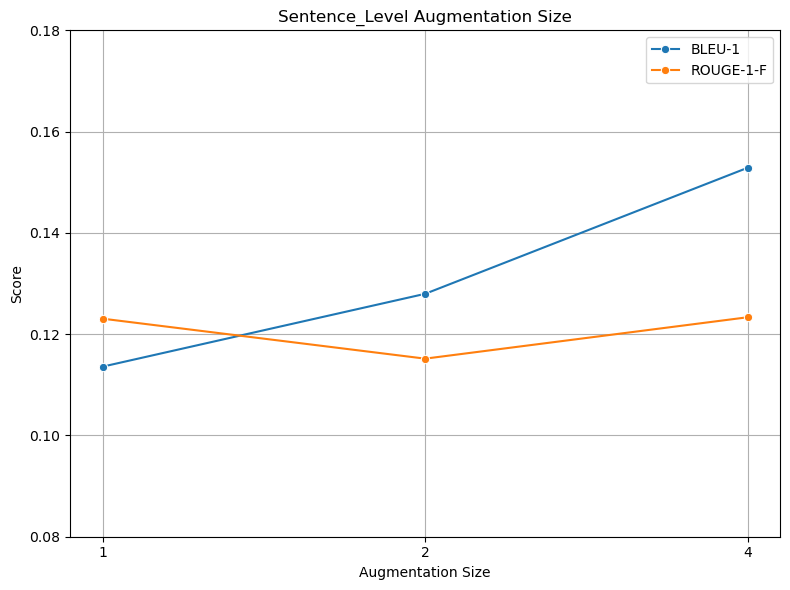

In [115]:

plot_generation_level_augmentation_scores("Sentence_Level")

In [118]:
def plot_augmentation_type_augmentation_scores(augmentation_type="random"):
    augmentation_type_df = final_df[final_df['augmentation_type'] == augmentation_type]
    one_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "1"]
    one_augmentation_df_avg_blue = one_augmentation_df['BLEU-1'].mean()
    one_augmentation_df_avg_rouge = one_augmentation_df['rouge-1-f'].mean()


    two_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "2"]
    two_augmentation_df_avg_blue = two_augmentation_df['BLEU-1'].mean()
    two_augmentation_df_avg_rouge = two_augmentation_df['rouge-1-f'].mean()

    four_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "4"]
    four_augmentation_df_avg_blue = four_augmentation_df['BLEU-1'].mean()
    four_augmentation_df_avg_rouge = four_augmentation_df['rouge-1-f'].mean()

    # Assuming you have already calculated the average scores
    # Create a DataFrame containing the average scores for each augmentation size
    data = {
        'Augmentation Size': ['1', '2', '4'],
        'BLEU-1': [one_augmentation_df_avg_blue, two_augmentation_df_avg_blue, four_augmentation_df_avg_blue],
        'ROUGE-1-F': [one_augmentation_df_avg_rouge, two_augmentation_df_avg_rouge, four_augmentation_df_avg_rouge]
    }

    avg_scores_df = pd.DataFrame(data)

    # Plot the line graph using Seaborn
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=avg_scores_df, x='Augmentation Size', y='BLEU-1', label='BLEU-1', marker='o')
    sns.lineplot(data=avg_scores_df, x='Augmentation Size', y='ROUGE-1-F', label='ROUGE-1-F', marker='o')
    plt.title(f'{augmentation_type} Augmentation Size')
    plt.xlabel('Augmentation Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.ylim(0.08, 0.18)
    plt.tight_layout()
    plt.savefig(f'{augmentation_type}_augmentation_size.png')
    plt.show()


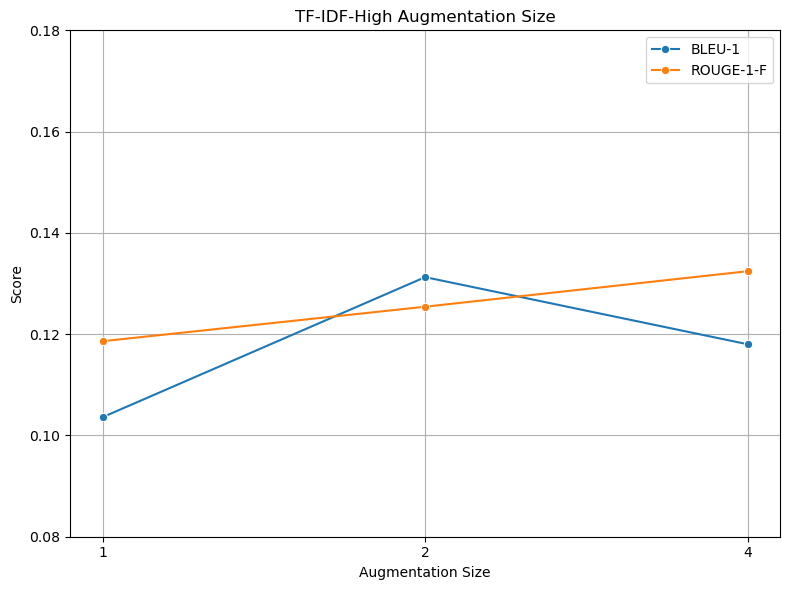

In [122]:
plot_augmentation_type_augmentation_scores("TF-IDF-High")

In [49]:
def plot_model_augmentation_scores(model="DCGAN_v1_Text"):
    model_df = final_df[final_df['DCGAN_v1_Text'] == model]
    one_augmentation_df = model_df[model_df['augmentation_size'] == "1"]
    one_augmentation_df_avg_blue = one_augmentation_df['BLEU-1'].mean()
    one_augmentation_df_avg_rouge = one_augmentation_df['rouge-1-f'].mean()


    two_augmentation_df = model_df[model_df['augmentation_size'] == "2"]
    two_augmentation_df_avg_blue = two_augmentation_df['BLEU-1'].mean()
    two_augmentation_df_avg_rouge = two_augmentation_df['rouge-1-f'].mean()

    four_augmentation_df = model_df[model_df['augmentation_size'] == "4"]
    four_augmentation_df_avg_blue = four_augmentation_df['BLEU-1'].mean()
    four_augmentation_df_avg_rouge = four_augmentation_df['rouge-1-f'].mean()

    # Assuming you have already calculated the average scores
    # Create a DataFrame containing the average scores for each augmentation size
    data = {
        'Augmentation Size': ['1', '2', '4'],
        'BLEU-1': [one_augmentation_df_avg_blue, two_augmentation_df_avg_blue, four_augmentation_df_avg_blue],
        'ROUGE-1-F': [one_augmentation_df_avg_rouge, two_augmentation_df_avg_rouge, four_augmentation_df_avg_rouge]
    }

    avg_scores_df = pd.DataFrame(data)

    # Plot the line graph using Seaborn
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=avg_scores_df, x='Augmentation Size', y='BLEU-1', label='BLEU-1', marker='o')
    sns.lineplot(data=avg_scores_df, x='Augmentation Size', y='ROUGE-1-F', label='ROUGE-1-F', marker='o')
    plt.title(f'{augmentation_type} Augmentation Size')
    plt.xlabel('Augmentation Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.ylim(0.08, 0.18)
    plt.tight_layout()
    plt.savefig(f'{augmentation_type}_augmentation_size.png')
    plt.show()
